# Bird Species Detection Project
## Preprocessing and Data Visualization

In [15]:
import os
import matplotlib.pyplot as plt
from torchvision import transforms, datasets
from torch.utils.data import DataLoader

### Define Paths and Parameters

In [16]:
train_data_dir = "/BIRD-SPECIES/dataset/train_data2/train_data2/"
img_size = (224, 224)
batch_size = 32

### Define Data Transformations with Preprocessing

### Visualize Original and Transformed Images

In [17]:
transform = transforms.Compose([
    transforms.Resize(img_size),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(20),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

### Load Data with Transformations and Prepare DataLoader

In [18]:
dataset = datasets.ImageFolder(root=train_data_dir)
original_images = [dataset[i][0] for i in range(5)] 

In [19]:
def visualize_preprocessing(original_images, transform):
    fig, axes = plt.subplots(2, len(original_images), figsize=(15, 6))
    for i, img in enumerate(original_images):
        axes[0, i].imshow(img)
        axes[0, i].set_title("Original")
        axes[0, i].axis('off')
        
        transformed_img = transform(img)
        transformed_img = transformed_img.permute(1, 2, 0)
        transformed_img = (transformed_img - transformed_img.min()) / (transformed_img.max() - transformed_img.min())  # Normalize for display
        axes[1, i].imshow(transformed_img)
        axes[1, i].set_title("Transformed")
        axes[1, i].axis('off')
    plt.tight_layout()
    plt.show()

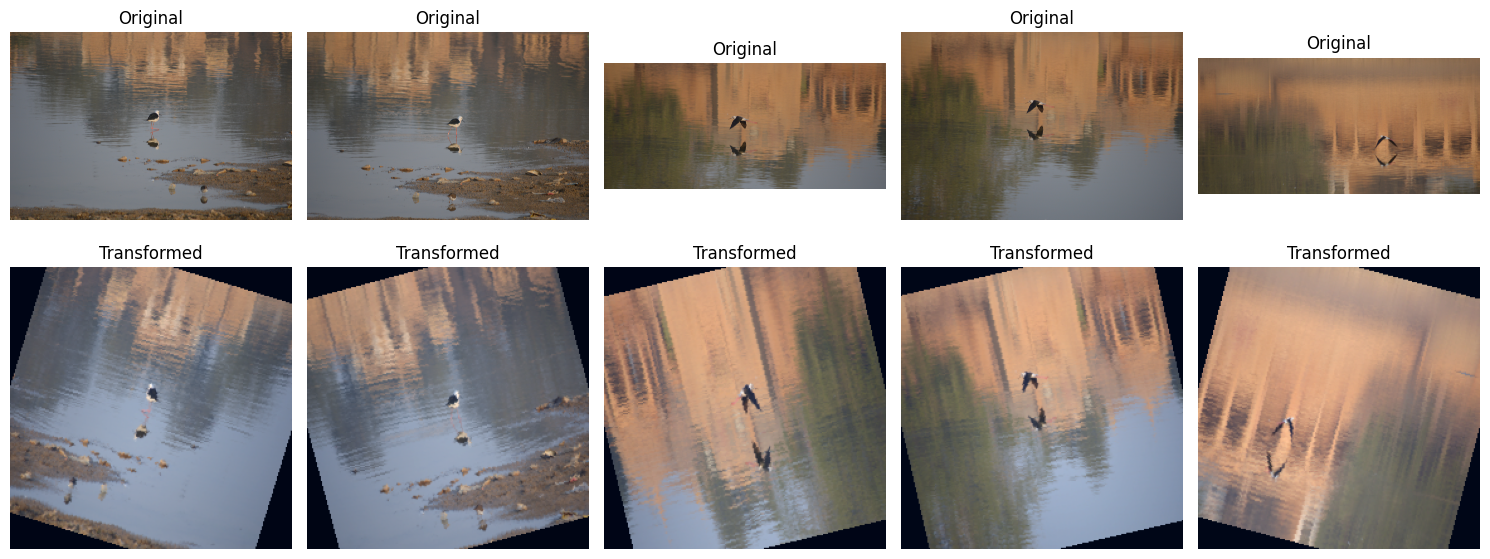

In [20]:
visualize_preprocessing(original_images, transform)

### Proceed to Training with Preprocessed Data